### Duplicates:

In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_excel(r"D:\Coding\Data-Prep-EDA\Code\Data\Student Grades.xlsx")
df.head()

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0


In [6]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
81    False
82    False
83    False
84    False
85    False
Length: 86, dtype: bool

In [7]:
df.duplicated().sum()

2

In [9]:
df[df.duplicated()]

,Student,Class,Year,Grade
43,Isaac,Intro to SQL,Sophomore,96.0
44,Isaac,Intro to SQL,Sophomore,96.0


In [10]:
df[df.duplicated(keep=False)]

,Student,Class,Year,Grade
42,Isaac,Intro to SQL,Sophomore,96.0
43,Isaac,Intro to SQL,Sophomore,96.0
44,Isaac,Intro to SQL,Sophomore,96.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Student  84 non-null     object 
 1   Class    83 non-null     object 
 2   Year     80 non-null     object 
 3   Grade    82 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.8+ KB


In [13]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, 0 to 85
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Student  82 non-null     object 
 1   Class    81 non-null     object 
 2   Year     78 non-null     object 
 3   Grade    80 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [14]:
df.duplicated().sum()

0

In [15]:
df = df.reset_index(drop=True)
df

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0
...,...,...,...,...
79,NaN,NaN,NaN,NaN
80,Bennett,NaN,NaN,NaN
81,NaN,EDA,Junior,84.0
82,Gavin,EDA,Senior,NaN


### Outliers:

In [17]:
import seaborn as sns

#### Histograms:

array([[<Axes: title={'center': 'Grade'}>]], dtype=object)

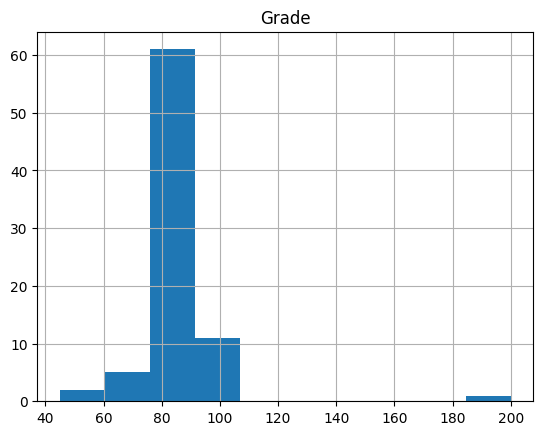

In [18]:
df.hist()

In [19]:
df.Grade.max() - df.Grade.min()

155.0

In [20]:
df.Grade = np.where(df.Grade > 100, 100, df.Grade)

array([[<Axes: title={'center': 'Grade'}>]], dtype=object)

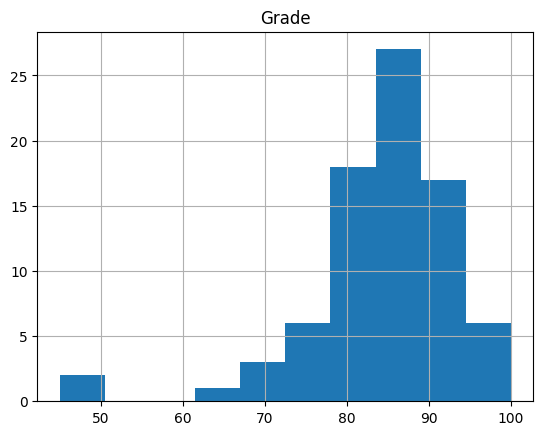

In [21]:
df.hist()

In [22]:
df.Grade.max() - df.Grade.min()

55.0

array([[<Axes: title={'center': 'Grade'}>]], dtype=object)

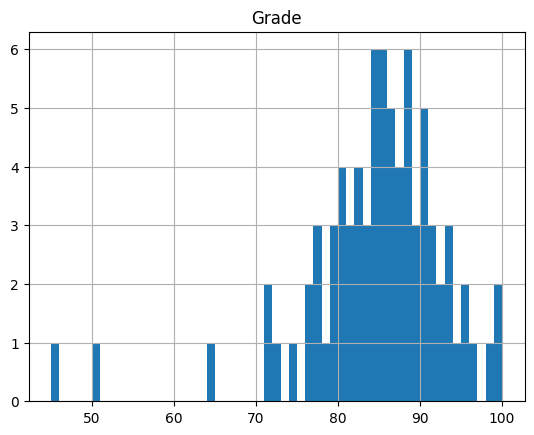

In [23]:
df.hist(bins=55)

<Axes: ylabel='Count'>

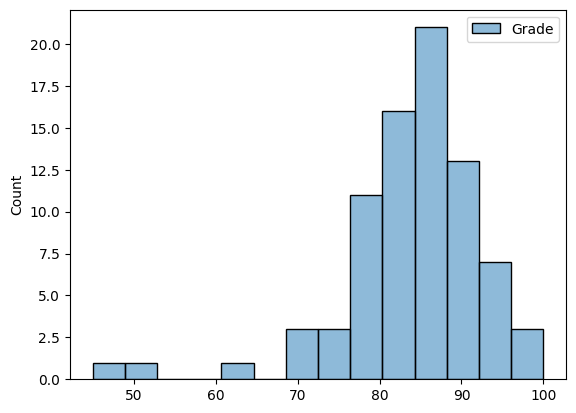

In [24]:
sns.histplot(df)

<Axes: ylabel='Count'>

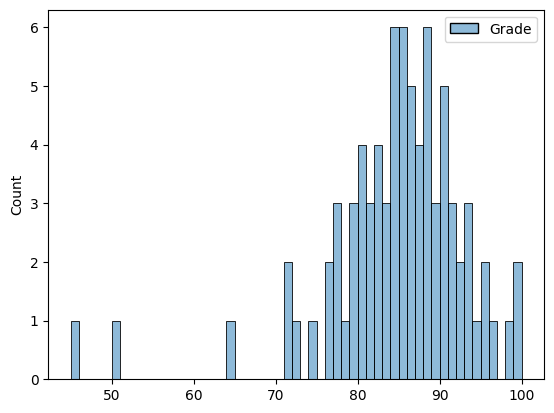

In [25]:
sns.histplot(df, binwidth=1)

<Axes: xlabel='Grade'>

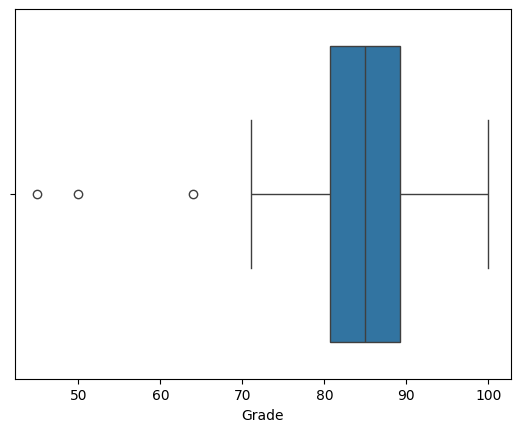

In [26]:
sns.boxplot(x=df.Grade)

In [32]:
df.Grade

0      86.0
1      86.0
2      86.0
3      87.0
4      90.0
      ...  
79      NaN
80      NaN
81     84.0
82      NaN
83    100.0
Name: Grade, Length: 84, dtype: float64

In [35]:
df = df.dropna()

In [36]:
q25, q50, q75 = np.percentile(df.Grade, (25, 50, 75))

In [37]:
q25, q50, q75

(80.0, 85.0, 89.5)

In [38]:
iqr = q75 - q25
iqr

9.5

In [39]:
min_grade = q25 - 1.5*iqr
max_grade = q75 + 1.5*iqr
min_grade, max_grade

(65.75, 103.75)

<Axes: xlabel='Grade'>

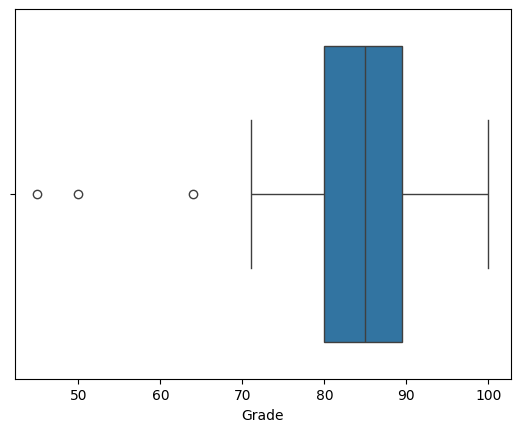

In [40]:
sns.boxplot(x=df.Grade)

In [41]:
df[df.Grade < min_grade]

,Student,Class,Year,Grade
37,John,Intro to Python,Freshman,50.0
54,Wyatt,Intro to SQL,Sophomore,45.0
67,Jaxon,Exploratory Data Analysis,Junior,64.0
